In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Saturday'

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [6]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

/Users/chuhanli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Timestamp('2015-07-04 00:00:00')

Pandas Time Series: Indexing by Time

In [7]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
data['2014-07-04':'2015-07-04']

In [ ]:
data['2015']

Pandas Time Series Data Structures

In [ ]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

In [ ]:
dates.to_period('D')

In [ ]:
dates - dates[0]

Regular sequences: pd.date_range()

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

In [ ]:
pd.date_range('2015-07-03', periods=8)

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='H')

In [ ]:
pd.period_range('2015-07', periods=8, freq='M')

In [ ]:
pd.timedelta_range(0, periods=10, freq='H')

In [ ]:
pd.timedelta_range(0, periods=9, freq="2H30T")

In [ ]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

Resampling, Shifting, and Windowing

In [2]:
pip install numexpt

ERROR: Could not find a version that satisfies the requirement numexpt (from versions: none)
ERROR: No matching distribution found for numexpt
Note: you may need to restart the kernel to use updated packages.


In [14]:
from pandas_datareader import data
from pandas.core.computation.check import NUMEXPR_INSTALLED

fred = data.DataReader('VIXCLS', start='2004', end='2023',
                       data_source='fred')
fred.head()

,VIXCLS
DATE,
2004-01-01,NaN
2004-01-02,18.22
2004-01-05,17.49
2004-01-06,16.73
2004-01-07,15.50


<AxesSubplot:xlabel='DATE'>

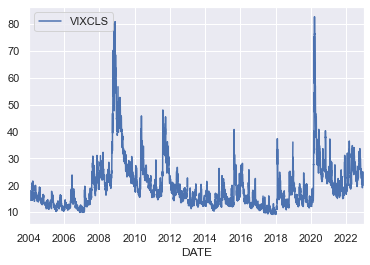

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
fred.plot()

Resampling and converting frequencies

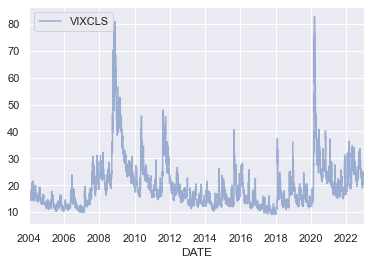

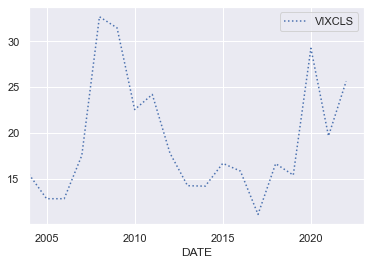

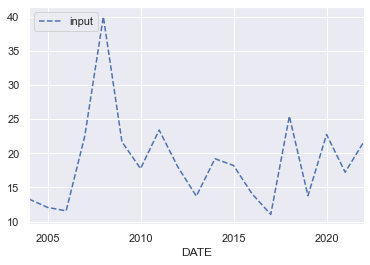

In [16]:
# at each point, resample reports the average of the previous year, while asfreq reports the value at the end of the year.

fred.plot(alpha=0.5, style='-')
fred.resample('BA').mean().plot(style=':')
fred.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');